In [125]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [30]:
movies = pd.read_csv('IMDB_Top250Engmovies2_OMDB_Detailed.csv')
movies = movies.dropna(how='all', axis=1)

In [31]:
movies['Released'] = pd.to_datetime(movies['Released'])

In [59]:
movies['Year'] = pd.to_numeric(movies['Year'])

In [32]:
movies.columns = movies.columns.str.replace('.', '')

In [33]:
movies.index = movies.index + 1

# What are the top 10 movies based on IMDb ratings?

In [40]:
movies[0:10]['Title']

1                              The Shawshank Redemption
2                                         The Godfather
3                                The Godfather: Part II
4                                       The Dark Knight
5                                          12 Angry Men
6                                      Schindler's List
7         The Lord of the Rings: The Return of the King
8                                          Pulp Fiction
9                                            Fight Club
10    The Lord of the Rings: The Fellowship of the Ring
Name: Title, dtype: object

# Which movie has the highest and lowest rating?


In [55]:
highest = movies['Title'][1]
lowest = movies.tail(1).values[0][0]
print(highest, '-', lowest)

The Shawshank Redemption - Slumdog Millionaire


# How many movies in the dataset were released in each decade?


In [90]:
movies['Year'] = movies['Year'].astype(str)
movies['Decade'] = movies['Year'].apply(lambda x: x[0:3]+'0s')

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,RatingsSource,RatingsValue,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoURL,DVD,BoxOffice,Production,Website,Response,Decade
1,The Shawshank Redemption,1994,R,1994-10-14,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.3/10,80.0,9.3,"1,825,626",tt0111161,movie,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True,1990s
2,The Godfather,1972,R,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.2/10,100.0,9.2,"1,243,444",tt0068646,movie,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True,1970s


In [93]:
pd.DataFrame(movies.groupby(by='Decade').count()['Title']).rename(columns={'Title': 'NumberOfMovies'})

,NumberOfMovies
Decade,
1920s,3
1930s,8
1940s,22
1950s,26
1960s,17
1970s,26
1980s,26
1990s,44
2000s,39


# What is the average runtime of movies in the dataset?


In [102]:
movies['Runtime'].apply(lambda x: x[0:3]).astype(int).mean()

126.808

<Axes: >

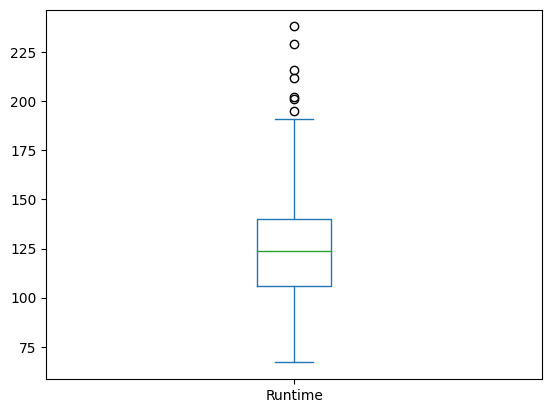

In [103]:
movies['Runtime'].apply(lambda x: x[0:3]).astype(int).plot(kind='box')

# Which director has the most movies in the top 250 list?


In [122]:
directors = movies['Director'].str.split(', ')
all_directors = [director for sublist in directors for director in sublist]
pd.Series(all_directors).value_counts().idxmax()

'Alfred Hitchcock'

# What is the distribution of genres among the top 250 movies?


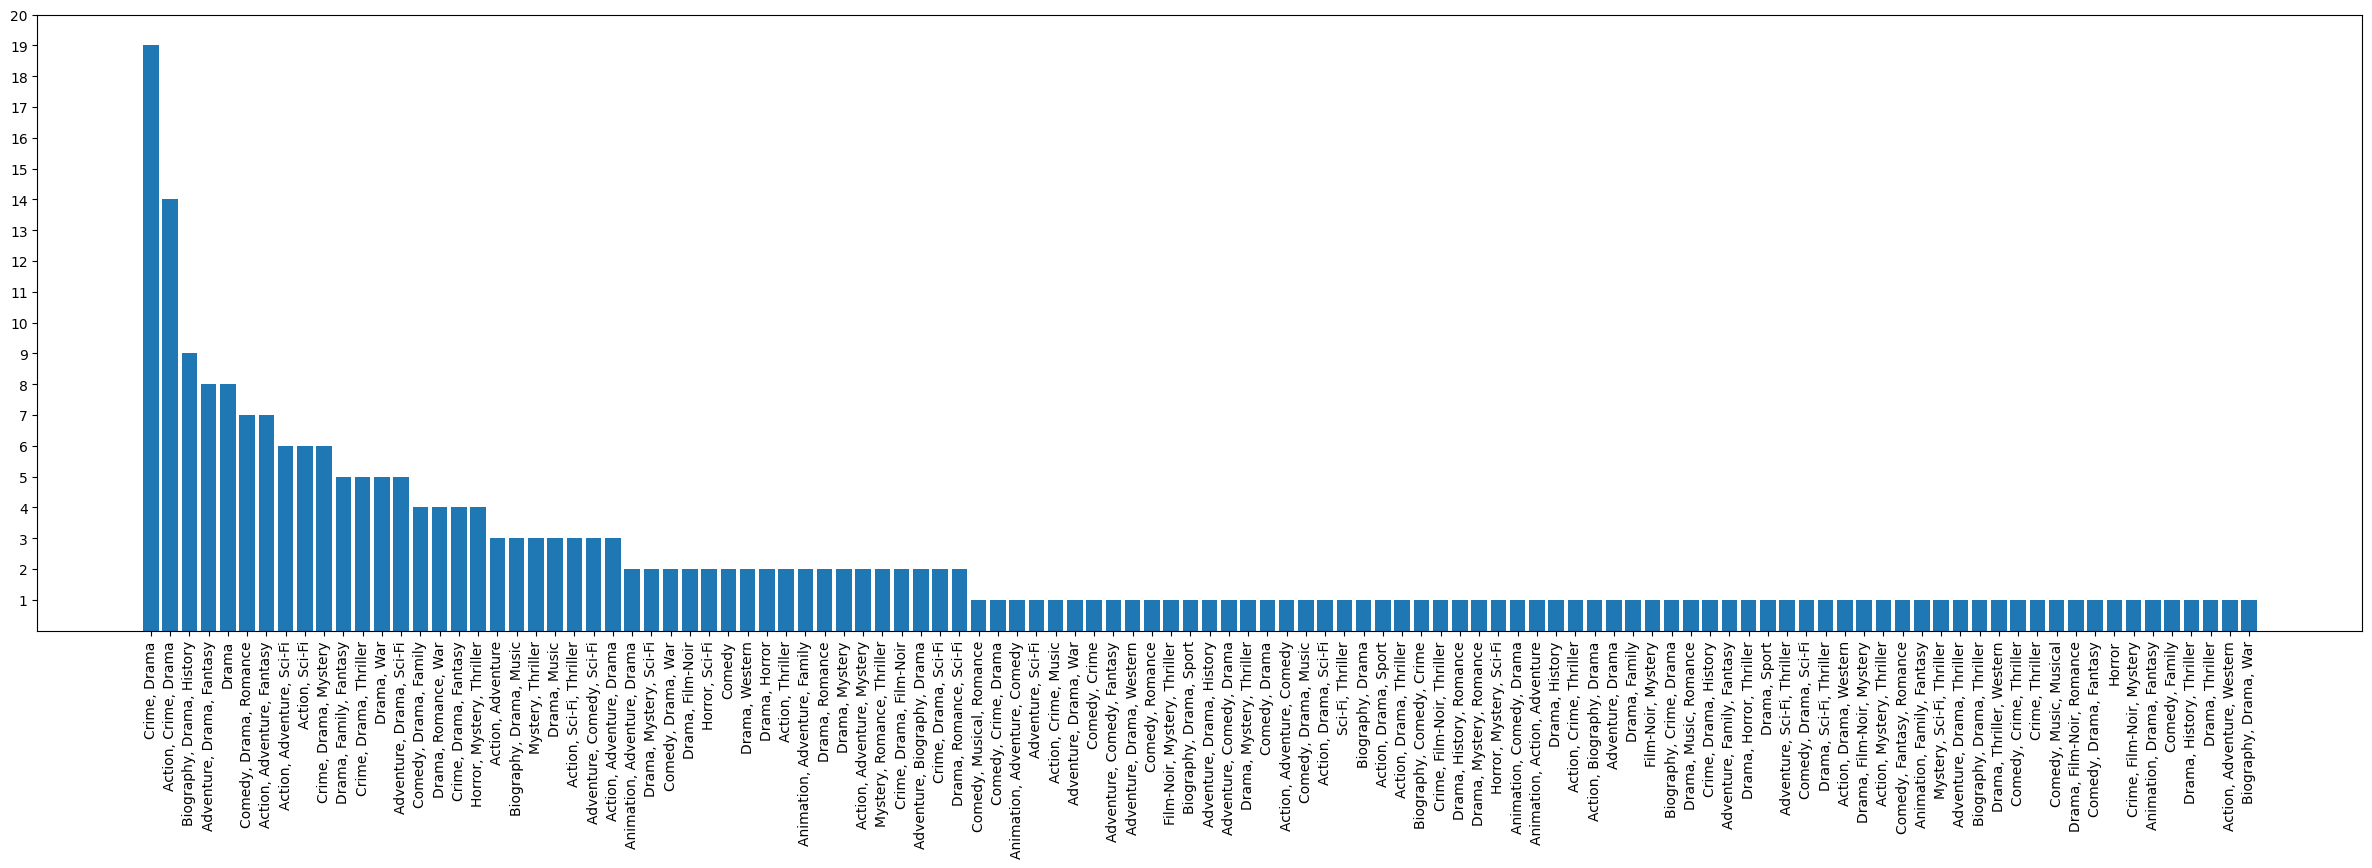

In [168]:
%matplotlib inline

plt.bar(movies['Genre'].unique(), movies['Genre'].value_counts())
plt.xticks(rotation='vertical')
plt.yticks(list(range(1, 21)))
plt.rcParams['figure.figsize'] = [30, 8]
plt.show()

# Which year had the highest number of movies in the top 250 list?


In [185]:
grouped = movies.groupby(by='Year').count()['Title']
year = grouped.idxmax()
print(f"The year {year} had the most releases with {grouped.loc[year]} movies.")

The year 1995 had the most releases with 8 movies.


# What is the average rating of movies released in the 2000s?


In [190]:
movies.groupby(by='Decade').get_group('2000s')['imdbRating'].mean()

8.261538461538462

# How many movies in the dataset were produced by each country?


In [196]:
countries = movies['Country'].str.split(', ')
all_countries = [country for sublist in countries for country in sublist]
pd.DataFrame(pd.Series(all_countries).value_counts())

,count
USA,233
UK,55
France,12
Germany,11
Canada,6
Australia,6
Italy,4
Ireland,4
Hong Kong,3
New Zealand,3


# How does the rating of movies vary based on their runtime?

In [213]:
avg_rate_by_runtime = movies.groupby('Runtime')['imdbRating'].mean()
pd.DataFrame(avg_rate_by_runtime).rename(columns={'imdbRating': 'avgImdbRating'})

,avgImdbRating
Runtime,
100 min,8.100000
101 min,8.020000
102 min,8.325000
103 min,8.233333
104 min,8.000000
...,...
95 min,8.200000
96 min,8.325000
97 min,8.100000


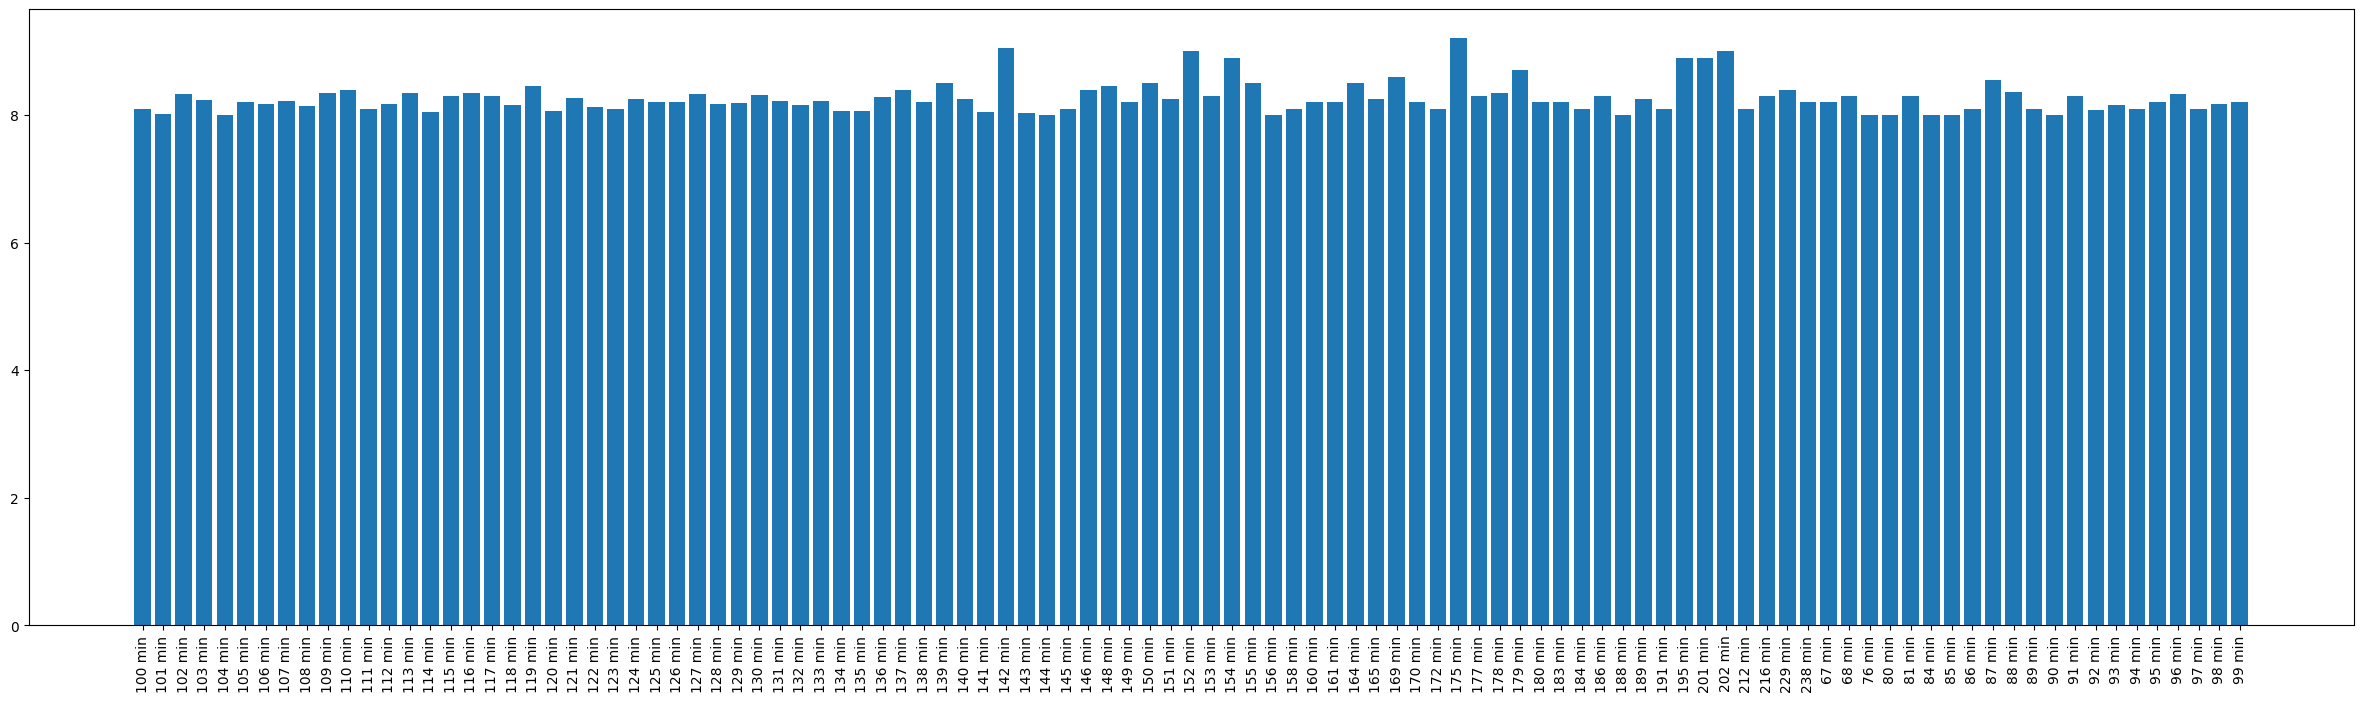

In [225]:
plt.bar(avg_rate_by_runtime.index, avg_rate_by_runtime)
plt.xticks(rotation='vertical')
plt.show()

# Which movie have the highest number of votes?


In [251]:
row = movies['imdbVotes'].apply(lambda x: x.replace(',', '')).astype(int).idxmax()
print(f"The movie with the highest number of votes is '{movies.loc[row]['Title']}' with {movies.loc[row]['imdbVotes']} votes.")

The movie with the highest number of votes is 'The Shawshank Redemption' with 1,825,626 votes.
